In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取split_roads.shp文件
split_roads = gpd.read_file('split_roads.shp')

# 获取地理范围
bounds = split_roads.bounds

print("=== 地理范围信息 ===")
print(f"最小经度 (minx): {bounds['minx'].min():.6f}")
print(f"最大经度 (maxx): {bounds['maxx'].max():.6f}")
print(f"最小纬度 (miny): {bounds['miny'].min():.6f}")
print(f"最大纬度 (maxy): {bounds['maxy'].max():.6f}")

# 计算范围大小（粗略估算）
width_km = (bounds['maxx'].max() - bounds['minx'].min()) * 111
height_km = (bounds['maxy'].max() - bounds['miny'].min()) * 111

print(f"\n=== 范围大小估算 ===")
print(f"东西方向宽度: {width_km:.2f} km")
print(f"南北方向高度: {height_km:.2f} km")
print(f"覆盖面积估算: {width_km * height_km:.2f} km²")

# 显示数据基本信息
print(f"\n=== 数据基本信息 ===")
print(f"要素数量: {len(split_roads)}")
print(f"坐标系统: {split_roads.crs}")
print(f"属性字段: {list(split_roads.columns)}")

# 可视化地理范围
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
split_roads.plot(ax=ax, color='red', linewidth=0.5)
ax.set_title('Split Roads 地理范围可视化', fontsize=14)
ax.set_xlabel('经度')
ax.set_ylabel('纬度')
ax.grid(True, alpha=0.3)

# 添加边界框
bounds_polygon = gpd.GeoDataFrame(
    geometry=[split_roads.unary_union.envelope],
    crs=split_roads.crs
)
bounds_polygon.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=2, linestyle='--')

plt.tight_layout()
plt.show()

DataSourceError: split_roads.shp: No such file or directory

=== 原始边界 ===
经度范围: 118.575106 到 119.009436
纬度范围: 31.923599 到 32.154249

=== 裁剪后边界 ===
经度范围: 118.792271 到 118.835704
纬度范围: 32.015859 到 32.038924

=== 裁剪结果 ===
原始道路数量: 207822
裁剪后道路数量: 4638
裁剪后的道路数据已保存为 small_scale_roads.shp


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 32428 (\N{CJK UNIFIED IDEOGRAPH-7EAC}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 36947 (\N{CJK UNIFIED IDEOGRAPH-9053}) missing from current font.
  ax.figure

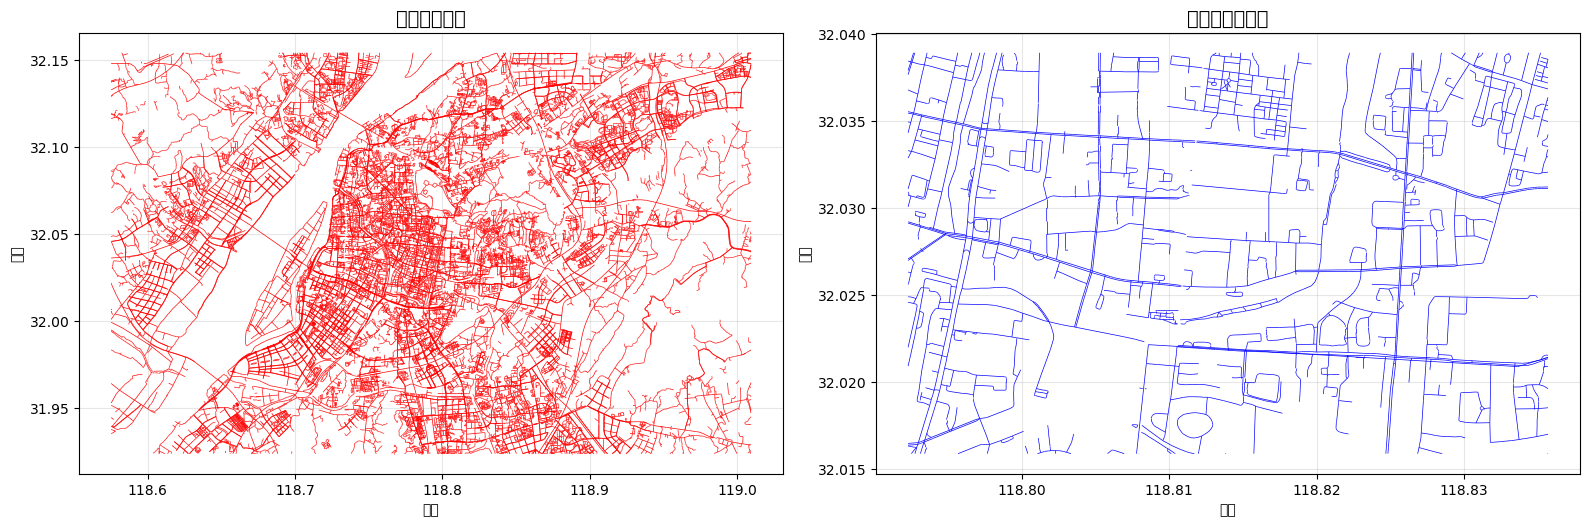


=== 裁剪后数据信息 ===
数据形状: (4638, 4)
坐标系统: EPSG:4326
属性字段: ['highway', 'length', 'width', 'geometry']

=== 裁剪后数据边界 ===
最小经度: 118.792271
最大经度: 118.835704
最小纬度: 32.015859
最大纬度: 32.038924


In [1]:
import geopandas as gpd
from shapely.geometry import box

# 读取test_roads.shp文件
test_roads = gpd.read_file('test_roads.shp')

# 获取原始边界
bounds = test_roads.bounds
minx, maxx = bounds['minx'].min(), bounds['maxx'].max()
miny, maxy = bounds['miny'].min(), bounds['maxy'].max()

print("=== 原始边界 ===")
print(f"经度范围: {minx:.6f} 到 {maxx:.6f}")
print(f"纬度范围: {miny:.6f} 到 {maxy:.6f}")

# 计算裁剪后的边界
# 东西方向取中间的十分之一
width = maxx - minx
new_minx = minx + width * (5/10)  # 从1/10处开始
new_maxx = minx + width * (6/10)  # 到9/10处结束

# 南北方向取中间的十分之一
height = maxy - miny
new_miny = miny + height * (4/10)  # 从1/10处开始
new_maxy = miny + height * (5/10)  # 到9/10处结束

# # 南北方向不变
# height = maxy - miny
# new_miny = miny + 0
# new_maxy = miny + height

print("\n=== 裁剪后边界 ===")
print(f"经度范围: {new_minx:.6f} 到 {new_maxx:.6f}")
print(f"纬度范围: {new_miny:.6f} 到 {new_maxy:.6f}")

# 创建裁剪边界框
clip_box = box(new_minx, new_miny, new_maxx, new_maxy)

# 裁剪道路数据
small_scale_roads = test_roads[test_roads.geometry.intersects(clip_box)].copy()

# 对相交的几何体进行精确裁剪
small_scale_roads['geometry'] = small_scale_roads.geometry.intersection(clip_box)

# 移除空的几何体
small_scale_roads = small_scale_roads[~small_scale_roads.geometry.is_empty]

print(f"\n=== 裁剪结果 ===")
print(f"原始道路数量: {len(test_roads)}")
print(f"裁剪后道路数量: {len(small_scale_roads)}")

# 保存裁剪后的道路数据
small_scale_roads.to_file('small_scale_roads.shp')
print("裁剪后的道路数据已保存为 small_scale_roads.shp")

# 可视化对比
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# 原始数据
test_roads.plot(ax=ax1, color='red', linewidth=0.5)
ax1.set_title('原始道路数据', fontsize=14)
ax1.set_xlabel('经度')
ax1.set_ylabel('纬度')
ax1.grid(True, alpha=0.3)

# 裁剪后数据
small_scale_roads.plot(ax=ax2, color='blue', linewidth=0.5)
ax2.set_title('裁剪后道路数据', fontsize=14)
ax2.set_xlabel('经度')
ax2.set_ylabel('纬度')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 显示裁剪后数据的基本信息
print(f"\n=== 裁剪后数据信息 ===")
print(f"数据形状: {small_scale_roads.shape}")
print(f"坐标系统: {small_scale_roads.crs}")
print(f"属性字段: {list(small_scale_roads.columns)}")

# 获取裁剪后数据的边界
test_bounds = small_scale_roads.bounds
print(f"\n=== 裁剪后数据边界 ===")
print(f"最小经度: {test_bounds['minx'].min():.6f}")
print(f"最大经度: {test_bounds['maxx'].max():.6f}")
print(f"最小纬度: {test_bounds['miny'].min():.6f}")
print(f"最大纬度: {test_bounds['maxy'].max():.6f}")

In [7]:
import momepy
import geopandas as gpd
import os
import pandas as pd
import shapely
import numpy as np
import collections
from scipy.spatial import cKDTree
from tqdm import tqdm

def remove_false_nodes_by_highway_kdtree(gdf, tolerance=30, max_iterations=3):
    """
    清理道路拓扑：移除度为2的假节点
    只合并相同highway类型的道路，使用KD-tree进行高效空间搜索
    迭代式处理确保彻底清理
    """
    
    def single_iteration(gdf, tolerance):
        """单次迭代的合并逻辑"""
        if isinstance(gdf, (gpd.GeoDataFrame, gpd.GeoSeries)):
            df = gdf.reset_index(drop=True).explode(ignore_index=True)
            geom = df.geometry.array
        else:
            geom = gdf
            df = gpd.GeoSeries(gdf)

        # 提取坐标数组和每个几何体的坐标数量
        coords = shapely.get_coordinates(geom)
        indices = shapely.get_num_coordinates(geom)

        # 生成起点和终点坐标列表及其索引
        c = 0
        coordinates = []
        for i, ind in enumerate(indices):
            coordinates.append([c, i, 0])  # 起点
            coordinates.append([c + ind - 1, i, 1])  # 终点
            c += ind

        # 创建KD-tree进行高效空间搜索
        coords_array = np.array(coords)
        tree = cKDTree(coords_array[:, :2])
        
        # 在容差范围内查找邻近点
        nearby_points = tree.query_ball_tree(tree, tolerance)
        
        # 创建坐标字典：坐标 -> [具有该坐标的线段索引列表]
        coord_dict = collections.defaultdict(list)
        for i, (coord_idx, line_idx, pos) in enumerate(coordinates):
            coord = coords[coord_idx]
            coord_dict[tuple(coord)].append((line_idx, pos))
        
        # 查找度为2的节点（假节点）
        false_nodes = []
        processed_coords = set()
        
        for coord, lines in tqdm(coord_dict.items(), desc="检查节点", total=len(coord_dict)):
            if len(lines) == 2 and coord not in processed_coords:
                # 检查两条线是否有相同的highway类型
                line1_idx, line2_idx = lines[0][0], lines[1][0]
                
                # 获取highway类型
                highway1 = df.iloc[line1_idx].get('highway', 'unknown')
                highway2 = df.iloc[line2_idx].get('highway', 'unknown')
                
                # 只有当highway类型相同时才合并
                if highway1 == highway2:
                    false_nodes.append((coord, lines))
                    processed_coords.add(coord)
        
        if not false_nodes:
            return gdf, 0
        
        # 合并线段
        merged_lines = []
        merged_attributes = []
        used_indices = set()
        
        for coord, lines in tqdm(false_nodes, desc="合并道路"):
            line1_idx, line2_idx = lines[0][0], lines[1][0]
            
            if line1_idx in used_indices or line2_idx in used_indices:
                continue
                
            # 获取两条线
            line1 = geom[line1_idx]
            line2 = geom[line2_idx]
            
            # 合并线段
            if lines[0][1] == 0 and lines[1][1] == 0:  # 都是起点
                merged = line1.reverse().union(line2)
            elif lines[0][1] == 1 and lines[1][1] == 1:  # 都是终点
                merged = line1.union(line2.reverse())
            else:  # 一个起点，一个终点
                merged = line1.union(line2)
            
            # 确保是LineString
            if merged.geom_type == 'MultiLineString':
                merged = shapely.line_merge(merged)
            
            if merged.geom_type == 'LineString':
                merged_lines.append(merged)
                
                # 保留第一条线的所有属性
                attrs = df.iloc[line1_idx].to_dict()
                attrs['geometry'] = merged  # 更新几何
                merged_attributes.append(attrs)
                
                used_indices.add(line1_idx)
                used_indices.add(line2_idx)
        
        # 添加未使用的线段
        for i in tqdm(range(len(geom)), desc="处理剩余道路"):
            if i not in used_indices:
                merged_lines.append(geom[i])
                
                # 保留原始属性
                attrs = df.iloc[i].to_dict()
                attrs['geometry'] = geom[i]  # 确保几何正确
                merged_attributes.append(attrs)
        
        # 创建新的GeoDataFrame
        result = gpd.GeoDataFrame(merged_attributes, crs=df.crs)
        merged_count = len(geom) - len(merged_lines)
        
        return result, merged_count
    
    # 迭代执行
    current_gdf = gdf.copy()
    total_merged = 0
    
    # 使用tqdm创建迭代进度条
    with tqdm(total=max_iterations, desc="迭代清理", unit="轮") as pbar:
        for iteration in range(max_iterations):
            pbar.set_postfix({
                '当前道路数': len(current_gdf),
                '已合并': total_merged
            })
            
            result_gdf, merged_count = single_iteration(current_gdf, tolerance)
            
            if merged_count == 0:
                pbar.set_postfix({
                    '当前道路数': len(current_gdf),
                    '已合并': total_merged,
                    '状态': '完成'
                })
                pbar.update(1)
                print(f"\n第 {iteration + 1} 次迭代没有发现新的合并，停止迭代")
                break
            
            total_merged += merged_count
            current_gdf = result_gdf
            pbar.update(1)
            print(f"\n本次迭代合并了 {merged_count} 条道路")
    
    print(f"\n迭代完成：总共合并了 {total_merged} 条道路")
    print(f"最终道路数量：{len(current_gdf)}")
    
    return current_gdf

def fix_roads_with_momepy():
    """使用修改后的remove_false_nodes修复道路文件"""
    
    # 检查输入文件是否存在
    input_file = "roads_meters.shp"
    output_file = "fixed_roads.shp"
    
    if not os.path.exists(input_file):
        print(f"错误：未找到 {input_file} 文件！")
        return
    
    print("正在加载数据...")
    # 加载数据
    roads = gpd.read_file(input_file)
    print(f"加载了 {len(roads)} 条道路")
    print(f"原始字段: {list(roads.columns)}")
    
    # 数据预处理
    print("正在进行数据预处理...")
    
    # 确保几何类型是LineString
    roads = roads[roads.geometry.geom_type == 'LineString']
    print(f"LineString类型道路：{len(roads)} 条")
    
    # 检查highway字段
    if 'highway' not in roads.columns:
        print("警告：数据中没有highway字段，将使用默认处理方式")
        roads['highway'] = 'unknown'
    
    # 使用迭代式函数处理
    print("正在使用迭代式KD-tree优化的remove_false_nodes处理...")
    fixed_roads = remove_false_nodes_by_highway_kdtree(roads, tolerance=50, max_iterations=3)
    
    # 检查结果
    print(f"处理后字段: {list(fixed_roads.columns)}")
    print(f"字段数量对比: 原始 {len(roads.columns)} vs 处理后 {len(fixed_roads.columns)}")
    
    # 保存结果
    print(f"正在保存结果到 {output_file}...")
    fixed_roads.to_file(output_file)
    print(f"✓ 处理完成！输出文件：{output_file}")
    print(f"  原始道路数量：{len(roads)}")
    print(f"  处理后道路数量：{len(fixed_roads)}")
    print(f"  减少了 {len(roads) - len(fixed_roads)} 条道路")

# 调用函数
if __name__ == "__main__":
    fix_roads_with_momepy()

正在加载数据...
加载了 4638 条道路
原始字段: ['highway', 'length', 'width', 'geometry']
正在进行数据预处理...
LineString类型道路：4638 条
正在使用迭代式KD-tree优化的remove_false_nodes处理...


迭代清理:  33%|███▎      | 1/3 [00:00<00:01,  1.28轮/s, 当前道路数=2756, 已合并=1882]


本次迭代合并了 1882 条道路


迭代清理:  67%|██████▋   | 2/3 [00:01<00:00,  1.68轮/s, 当前道路数=1884, 已合并=2754]


本次迭代合并了 872 条道路


迭代清理: 100%|██████████| 3/3 [00:01<00:00,  2.00轮/s, 当前道路数=1884, 已合并=2754]



本次迭代合并了 381 条道路

迭代完成：总共合并了 3135 条道路
最终道路数量：1503
处理后字段: ['highway', 'length', 'width', 'geometry']
字段数量对比: 原始 4 vs 处理后 4
正在保存结果到 fixed_roads.shp...
✓ 处理完成！输出文件：fixed_roads.shp
  原始道路数量：4638
  处理后道路数量：1503
  减少了 3135 条道路


In [ ]:
# 在Jupyter Notebook的单元格中运行
import geopandas as gpd
import pandas as pd

# 加载数据
gdf = gpd.read_file("small_scale_roads.shp")

# 显示基本信息
print(f"数据形状: {gdf.shape}")
print(f"字段列表: {list(gdf.columns)}")

# 分析每个字段
for col in gdf.columns:
    if col == 'geometry':
        continue
    print(f"\n字段: {col}")
    print(f"数据类型: {gdf[col].dtype}")
    print(f"空值数量: {gdf[col].isna().sum()}")
    
    if gdf[col].dtype == 'object':
        unique_values = gdf[col].dropna().unique()
        print(f"Unique值: {unique_values}")
    else:
        print(f"数值范围: {gdf[col].min()} - {gdf[col].max()}")

数据形状: (4638, 4)
字段列表: ['highway', 'length', 'width', 'geometry']

字段: highway
数据类型: object
空值数量: 0
Unique值: ['primary' 'secondary' 'tertiary' 'footway']

字段: length
数据类型: object
空值数量: 0
Unique值: ['0.0723339014817066' '0.056' '0.024' '0.030' '0.129' '0.040' '0.088'
 '0.068' '0.041' '0.018' '0.032' '0.036' '0.042' '0.060' '0.047' '0.064'
 '0.094' '0.033' '0.016' '0.076' '0.021' '0.044' '0.017' '0.049' '0.057'
 '0.128' '0.031' '0.027' '0.020' '0.038' '0.006' '0.069' '0.025' '0.023'
 '0.213' '0.073' '0.146' '0.028' '0.066' '0.182' '0.058' '0.423' '0.039'
 '0.156' '0.119' '0.082' '0.008' '0.166' '0.019' '0.045' '0.050' '0.109'
 '0.037' '0.009' '0.233' '0.174' '0.191' '0.175' '0.111' '0.071' '0.062'
 '0.010' '0.013' '0.180' '0.238' '0.048' '0.106' '0.133' '0.084' '0.108'
 '0.070' '0.172' '0.426' '0.193' '0.081' '0.184' '0.185' '0.098' '0.096'
 '0.086' '0.165' '0.011' '0.035' '0.085' '0.267' '0.091' '0.012' '0.117'
 '0.144' '0.090' '0.080' '0.007' '0.034' '0.103' '0.046' '0.059' '0.092'
 '0.1

In [5]:
import geopandas as gpd
from pyproj import CRS

# 读取您的数据
gdf = gpd.read_file('small_scale_roads.shp')

# 查看当前坐标系
print(f"当前坐标系: {gdf.crs}")

# 直接转换为中国CGCS2000坐标系（39度带）
cgcs2000_crs = CRS.from_epsg(4547)  # CGCS2000 / 3-degree Gauss-Kruger zone 39
gdf_meters = gdf.to_crs(cgcs2000_crs)

print(f"转换后坐标系: {gdf_meters.crs}")
print(f"转换后单位: {gdf_meters.crs.axis_info[0].unit_name}")

# 查看转换后的范围
bounds = gdf_meters.bounds
print(f"\n转换后数据范围 (米):")
print(f"X: {bounds['minx'].min():.2f} 到 {bounds['maxx'].max():.2f}")
print(f"Y: {bounds['miny'].min():.2f} 到 {bounds['maxy'].max():.2f}")

# 保存转换后的数据
gdf_meters.to_file('roads_meters.shp')
print("\n转换后的数据已保存为 'roads_meters.shp'")

# 现在tolerance=1.0就是1米了，比较合理
print("\n现在tolerance=1.0意味着1米，适合道路网络清理！")

当前坐标系: EPSG:4326
转换后坐标系: EPSG:4547
转换后单位: metre

转换后数据范围 (米):
X: 952880.06 到 957101.39
Y: 3553669.76 到 3556411.80

转换后的数据已保存为 'roads_meters.shp'

现在tolerance=1.0意味着1米，适合道路网络清理！
